In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
naive_CM_f = "../naive.csv"
benchmark_df = pd.read_csv(naive_CM_f)

IS_df = benchmark_df[benchmark_df["name"].str.contains("Interval")]
CM_df = benchmark_df[benchmark_df["name"].str.contains("CMS")]
RS_df = benchmark_df[benchmark_df["name"].str.contains("Range")]
EX_df = benchmark_df[benchmark_df["name"].str.contains("Exact")]

/tmp/ipykernel_3433723/2070439847.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  benchmark_df = pd.read_csv(naive_CM_f)


In [5]:
def process_out(benchmark_df):
    access_df = benchmark_df[benchmark_df["name"].str.contains("Access")]
    frequency_df = benchmark_df[benchmark_df["name"].str.contains("Frequency")]
    access_df["name"] = access_df["name"].map(lambda x : x.split("/")[-1])
    frequency_df["name"] = frequency_df["name"].map(lambda x : x.split("/")[-1])
    access_df["real_time"] = access_df["real_time"] / 1000
    frequency_df["real_time"] = frequency_df["real_time"] / 1000
    frequency_df
    return access_df, frequency_df

In [6]:
IS_access_df, IS_frequency_df = process_out(IS_df)
CM_access_df, CM_frequency_df = process_out(CM_df)
RS_access_df, RS_frequency_df = process_out(RS_df)
EX_access_df, EX_frequency_df = process_out(EX_df)

/tmp/ipykernel_3433723/2499925592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  access_df["name"] = access_df["name"].map(lambda x : x.split("/")[-1])
/tmp/ipykernel_3433723/2499925592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequency_df["name"] = frequency_df["name"].map(lambda x : x.split("/")[-1])
/tmp/ipykernel_3433723/2499925592.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

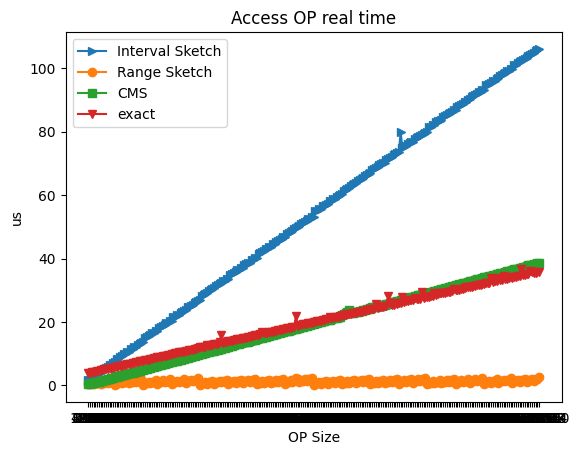

In [12]:
x_value = CM_access_df["name"]
IS_access_time = IS_access_df["real_time"]
CM_access_time = CM_access_df["real_time"]
RS_access_time = RS_access_df["real_time"]
EX_access_time = EX_access_df["real_time"]

plt.plot(x_value, IS_access_time, label="Interval Sketch", marker='>')
plt.plot(x_value, RS_access_time, label='Range Sketch', marker='o')
plt.plot(x_value, CM_access_time, label='CMS', marker='s')
plt.plot(x_value, EX_access_time, label="exact", marker='v')

plt.legend()

plt.title('Access OP real time')
plt.xlabel('OP Size')
plt.ylabel('us')

plt.show()

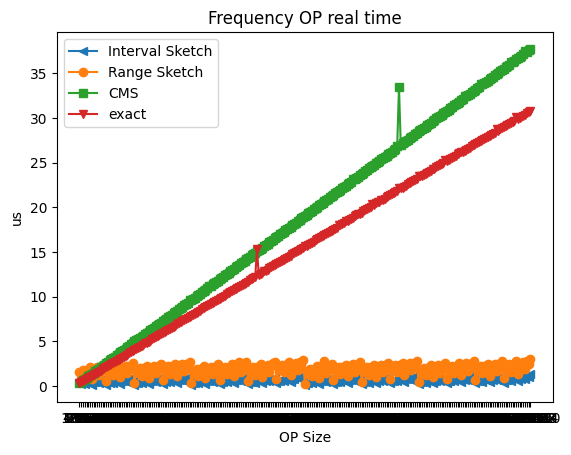

In [13]:
x_value = CM_frequency_df["name"]
IS_frequency_time = IS_frequency_df["real_time"]
CM_frequency_time = CM_frequency_df["real_time"]
RS_frequency_time = RS_frequency_df["real_time"]
EX_frequency_time = EX_frequency_df["real_time"]

plt.plot(x_value, IS_frequency_time, label="Interval Sketch", marker='<')
plt.plot(x_value, RS_frequency_time, label='Range Sketch', marker='o')
plt.plot(x_value, CM_frequency_time, label='CMS', marker='s')
plt.plot(x_value, EX_frequency_time, label="exact", marker='v')

plt.legend()

plt.title('Frequency OP real time')
plt.xlabel('OP Size')
plt.ylabel('us')

plt.show()